<a href="https://colab.research.google.com/github/shivani-nandani/rumor-spread/blob/main/Trust_in_SIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random as rd
%matplotlib inline

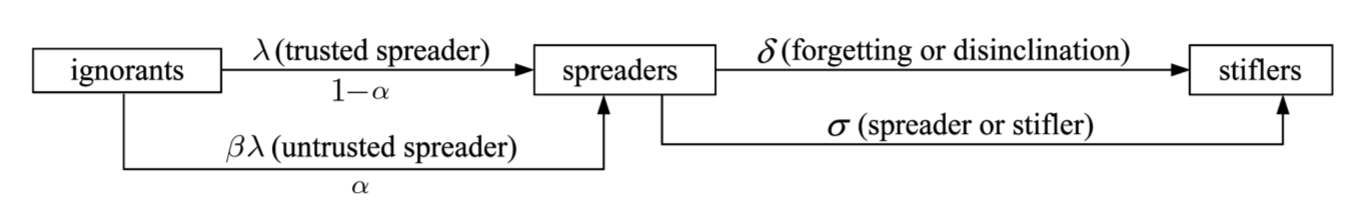

Resemblance to the SIR model:


*   Ignorants (similar to Susceptible): they have never heard of the rumour
*   Spreaders (similar to Infective): they are spreading the rumour
*   Stiflers (similar to Removed): they have heard the rumour but do not spread it





$\alpha =$ fraction of untrusted neighbours $(0< \alpha < 1)$

$\lambda =$ infection rate when a uninfected node contacts an infected trusted neighbour

$\beta =$ factor to infection rate when a uninfected node contacts an infected untrused neighbour $(0<\beta < 1)$

$\sigma =$ rate at which a spreader becomes a stifler when the spreader contacts a spreader or a stifler

$\delta =$ stifling rate (forgetting or disinclination), no contact needed

### equations:
- $\displaystyle \frac{dI(t)}{dt} = - \beta \lambda \langle k \rangle \alpha S(t) I(t) - \lambda \langle k \rangle (1-\alpha) S(t) I(t)$


- $\displaystyle \frac{dS(t)}{dt} = \beta \lambda \langle k \rangle \alpha S(t) I(t) + \lambda \langle k \rangle (1-\alpha) S(t) I(t) - \sigma \langle k \rangle S(t) (S(t)+R(t)) - \delta S(t)$


- $\displaystyle \frac{dR(t)}{dt} = \sigma \langle k \rangle S(t) (S(t)+R(t)) + \delta S(t)$


where $\langle k \rangle$ denotes the average degree of the network.

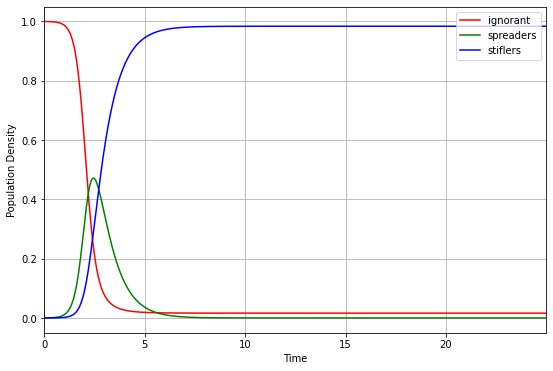

In [70]:
N = 5000   # population

# ignorant to spreader
alpha = 0.6  # untrusted neighbours (0<alpha<1)
lambda_ = 0.8  # infection rate when a uninfected node contacts an infected trusted neighbour
beta = 0.6  # factor to infection rate when a uninfected node contacts an infected untrused neighbour (0<beta<1)

# spreader to stifler
sigma = 0.1  # rate at which a spreader becomes a stifler when the spreader contacts a spreader or a stifler
delta = 0.7  # stifling rate (forgetting or disinclination), no contact needed

# homogenous network
k = 6   # degree

I0 = 4999/N
S0 = 1/N
R0 = 0/N

start = 0
end = 25
dt = 0.01
t = np.arange(start,end,dt)
n = int((end-start)/dt)

I = np.zeros(n) # ignorant
S = np.zeros(n) # spreader
R = np.zeros(n) # stifler

I[0] = I0
S[0] = S0
R[0] = R0

for i in range(1,n):
  I[i] = I[i-1] + (-(beta + (1-alpha))*S[i-1]*I[i-1]*k*lambda_)*dt
  S[i] = S[i-1] + ((beta + (1-alpha))*S[i-1]*I[i-1]*k*lambda_ - (sigma*k*S[i-1]*(S[i-1]+R[i-1]) + delta*S[i-1]))*dt
  R[i] = R[i-1] + (sigma*k*S[i-1]*(S[i-1]+R[i-1]) + delta*S[i-1])*dt


plt.figure(figsize = [9,6])
plt.plot(t, I, c = 'r', linestyle = '-', label = 'ignorant')
plt.plot(t, S, c = 'g', linestyle = '-', label = 'spreaders')
plt.plot(t, R, c = 'b', linestyle = '-', label = 'stiflers')
plt.ylabel('Population Density')
plt.xlabel('Time')
plt.legend(loc = 'upper right')
plt.xlim(0, max(t))
plt.grid()
plt.show()

In [71]:
print('Fraction Ignorant = ', I[-1])
print('Fraction Spreader = ', S[-1])
print('Fraction Stifler = ', R[-1])

Fraction Ignorant =  0.016305035162683765
Fraction Spreader =  9.630842072806692e-13
Fraction Stifler =  0.9836949648363521


### The final rumor size R versus the rumor transmission rate λ for the proportion of the untrusted spreader nodes α = 0, 0.4, 0.8, 1

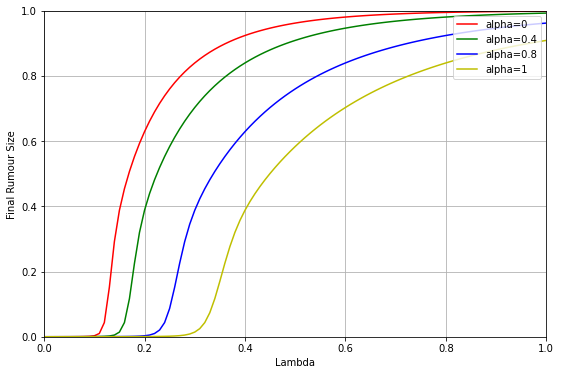

In [4]:
# R vs lambda, changing alpha

N = 5000   # population

# ignorant to spreader
alpha_arr = [0,0.4,0.8,1]  # untrusted neighbours (0<alpha<1)
lambda_arr = np.arange(0,1+0.01,0.01)  # infection rate when a uninfected node contacts an infected trusted neighbour
beta = 0.6  # factor to infection rate when a uninfected node contacts an infected untrused neighbour (0<beta<1)

# spreader to stifler
sigma = 0.1  # rate at which a spreader becomes a stifler when the spreader contacts a spreader or a stifler
delta = 1  # stifling rate (forgetting or disinclination), no contact needed

# homogenous network
k = 6   # degree

I0 = 4999/N
S0 = 1/N
R0 = 0/N

start = 0
end = 25
dt = 0.01
t = np.arange(start,end,dt)
n = int((end-start)/dt)

R_table = []
for alpha in alpha_arr:
  final_R = []
  for lambda_ in lambda_arr:
    I = np.zeros(n) # ignorant
    S = np.zeros(n) # spreader
    R = np.zeros(n) # stifler

    I[0] = I0
    S[0] = S0
    R[0] = R0

    for i in range(1,n):
      I[i] = I[i-1] + (-(beta + (1-alpha))*S[i-1]*I[i-1]*k*lambda_)*dt
      S[i] = S[i-1] + ((beta + (1-alpha))*S[i-1]*I[i-1]*k*lambda_ - (sigma*k*S[i-1]*(S[i-1]+R[i-1]) + delta*S[i-1]))*dt
      R[i] = R[i-1] + (sigma*k*S[i-1]*(S[i-1]+R[i-1]) + delta*S[i-1])*dt
    final_R.append(R[-1])
  R_table.append(final_R)


plt.figure(figsize = [9,6])
plt.plot(lambda_arr, R_table[0], c = 'r', linestyle = '-', label = 'alpha=0')
plt.plot(lambda_arr, R_table[1], c = 'g', linestyle = '-', label = 'alpha=0.4')
plt.plot(lambda_arr, R_table[2], c = 'b', linestyle = '-', label = 'alpha=0.8')
plt.plot(lambda_arr, R_table[3], c = 'y', linestyle = '-', label = 'alpha=1')
plt.ylabel('Final Rumour Size')
plt.xlabel('Lambda')
plt.legend(loc = 'upper right')
plt.xlim(0, max(lambda_arr))
plt.ylim(0,1)
plt.grid()
plt.show()

### The dependence of the final rumor size R on the rumor transmission rate λ for σ = 0, 0.1, 0.2, 0.3

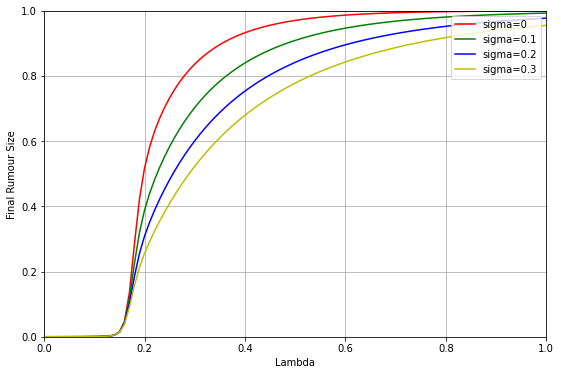

In [5]:
# R vs lambda, changing sigma

N = 5000   # population

# ignorant to spreader
alpha = 0.4  # untrusted neighbours (0<alpha<1)
lambda_arr = np.arange(0,1+0.01,0.01)  # infection rate when a uninfected node contacts an infected trusted neighbour
beta = 0.6  # factor to infection rate when a uninfected node contacts an infected untrused neighbour (0<beta<1)

# spreader to stifler
sigma_arr = [0,0.1,0.2,0.3]  # rate at which a spreader becomes a stifler when the spreader contacts a spreader or a stifler
delta = 1  # stifling rate (forgetting or disinclination), no contact needed

# homogenous network
k = 6   # degree

I0 = 4999/N
S0 = 1/N
R0 = 0/N

start = 0
end = 25
dt = 0.01
t = np.arange(start,end,dt)
n = int((end-start)/dt)

R_table = []
for sigma in sigma_arr:
  final_R = []
  for lambda_ in lambda_arr:
    I = np.zeros(n) # ignorant
    S = np.zeros(n) # spreader
    R = np.zeros(n) # stifler

    I[0] = I0
    S[0] = S0
    R[0] = R0

    for i in range(1,n):
      I[i] = I[i-1] + (-(beta + (1-alpha))*S[i-1]*I[i-1]*k*lambda_)*dt
      S[i] = S[i-1] + ((beta + (1-alpha))*S[i-1]*I[i-1]*k*lambda_ - (sigma*k*S[i-1]*(S[i-1]+R[i-1]) + delta*S[i-1]))*dt
      R[i] = R[i-1] + (sigma*k*S[i-1]*(S[i-1]+R[i-1]) + delta*S[i-1])*dt
    final_R.append(R[-1])
  R_table.append(final_R)


plt.figure(figsize = [9,6])
plt.plot(lambda_arr, R_table[0], c = 'r', linestyle = '-', label = 'sigma=0')
plt.plot(lambda_arr, R_table[1], c = 'g', linestyle = '-', label = 'sigma=0.1')
plt.plot(lambda_arr, R_table[2], c = 'b', linestyle = '-', label = 'sigma=0.2')
plt.plot(lambda_arr, R_table[3], c = 'y', linestyle = '-', label = 'sigma=0.3')
plt.ylabel('Final Rumour Size')
plt.xlabel('Lambda')
plt.legend(loc = 'upper right')
plt.xlim(0, max(lambda_arr))
plt.ylim(0,1)
plt.grid()
plt.show()

### The density of the spreader nodes S(t) as a function of time t for the proportion of the untrusted spreader nodes α = 0, 1

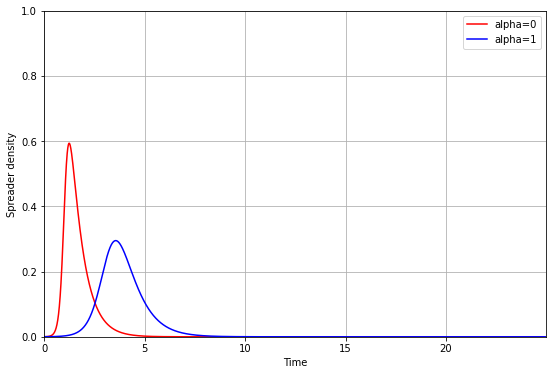

In [6]:
# Spreader density vs time, changing alpha

N = 5000   # population

# ignorant to spreader
alpha_arr = [0,1]  # untrusted neighbours (0<alpha<1)
lambda_ = 1  # infection rate when a uninfected node contacts an infected trusted neighbour
beta = 0.6  # factor to infection rate when a uninfected node contacts an infected untrused neighbour (0<beta<1)

# spreader to stifler
sigma = 0.1  # rate at which a spreader becomes a stifler when the spreader contacts a spreader or a stifler
delta = 1  # stifling rate (forgetting or disinclination), no contact needed

# homogenous network
k = 6   # degree

I0 = 4999/N
S0 = 1/N
R0 = 0/N

start = 0
end = 25
dt = 0.01
t = np.arange(start,end,dt)
n = int((end-start)/dt)

S_table = []
for alpha in alpha_arr:
  I = np.zeros(n) # ignorant
  S = np.zeros(n) # spreader
  R = np.zeros(n) # stifler

  I[0] = I0
  S[0] = S0
  R[0] = R0

  for i in range(1,n):
    I[i] = I[i-1] + (-(beta + (1-alpha))*S[i-1]*I[i-1]*k*lambda_)*dt
    S[i] = S[i-1] + ((beta + (1-alpha))*S[i-1]*I[i-1]*k*lambda_ - (sigma*k*S[i-1]*(S[i-1]+R[i-1]) + delta*S[i-1]))*dt
    R[i] = R[i-1] + (sigma*k*S[i-1]*(S[i-1]+R[i-1]) + delta*S[i-1])*dt

  S_table.append(S)


plt.figure(figsize = [9,6])
plt.plot(t, S_table[0], c = 'r', linestyle = '-', label = 'alpha=0')
plt.plot(t, S_table[1], c = 'b', linestyle = '-', label = 'alpha=1')
plt.ylabel('Spreader density')
plt.xlabel('Time')
plt.legend(loc = 'upper right')
plt.xlim(0, max(t))
plt.ylim(0,1)
plt.grid()
plt.show()

### The evolution relationship between the density of stifler nodes R(t) and the time t for the proportion of the untrusted spreader nodes α = 0, 1

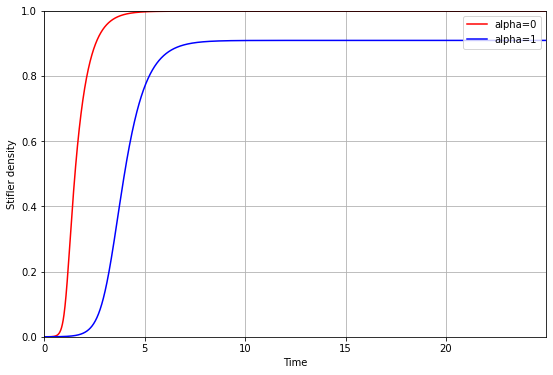

In [7]:
# Stifler density vs time, changing alpha

N = 5000   # population

# ignorant to spreader
alpha_arr = [0,1]  # untrusted neighbours (0<alpha<1)
lambda_ = 1  # infection rate when a uninfected node contacts an infected trusted neighbour
beta = 0.6  # factor to infection rate when a uninfected node contacts an infected untrused neighbour (0<beta<1)

# spreader to stifler
sigma = 0.1  # rate at which a spreader becomes a stifler when the spreader contacts a spreader or a stifler
delta = 1  # stifling rate (forgetting or disinclination), no contact needed

# homogenous network
k = 6   # degree

I0 = 4999/N
S0 = 1/N
R0 = 0/N

start = 0
end = 25
dt = 0.01
t = np.arange(start,end,dt)
n = int((end-start)/dt)

R_table = []
for alpha in alpha_arr:
  I = np.zeros(n) # ignorant
  S = np.zeros(n) # spreader
  R = np.zeros(n) # stifler

  I[0] = I0
  S[0] = S0
  R[0] = R0

  for i in range(1,n):
    I[i] = I[i-1] + (-(beta + (1-alpha))*S[i-1]*I[i-1]*k*lambda_)*dt
    S[i] = S[i-1] + ((beta + (1-alpha))*S[i-1]*I[i-1]*k*lambda_ - (sigma*k*S[i-1]*(S[i-1]+R[i-1]) + delta*S[i-1]))*dt
    R[i] = R[i-1] + (sigma*k*S[i-1]*(S[i-1]+R[i-1]) + delta*S[i-1])*dt

  R_table.append(R)


plt.figure(figsize = [9,6])
plt.plot(t, R_table[0], c = 'r', linestyle = '-', label = 'alpha=0')
plt.plot(t, R_table[1], c = 'b', linestyle = '-', label = 'alpha=1')
plt.ylabel('Stifler density')
plt.xlabel('Time')
plt.legend(loc = 'upper right')
plt.xlim(0, max(t))
plt.ylim(0,1)
plt.grid()
plt.show()

### Simulation on Watts-Strogatz Graph

In [19]:
sir_color = dict()
sir_color['ignorant'] = 'red'
sir_color['spreader'] = 'green'
sir_color['stifler'] = 'blue'
sir_color

{'ignorant': 'red', 'spreader': 'green', 'stifler': 'blue'}

In [63]:
N = 5000   # population

# ignorant to spreader
alpha = 0.6  # untrusted neighbours (0<alpha<1)
lambda_ = 0.8  # infection rate when a uninfected node contacts an infected trusted neighbour
beta = 0.6  # factor to infection rate when a uninfected node contacts an infected untrused neighbour (0<beta<1)

# spreader to stifler
sigma = 0.1  # rate at which a spreader becomes a stifler when the spreader contacts a spreader or a stifler
delta = 0.7  # stifling rate (forgetting or disinclination), no contact needed

# homogenous network
k = 6   # degree

start = 0
end = 10
dt = 0.01
t = np.arange(start, end, dt)
n = int((end-start)/dt)

In [64]:
color_map = np.empty(N).astype(str)

color_map[:] = sir_color['ignorant']
color_map[rd.randint(0,N-1)] = sir_color['spreader']

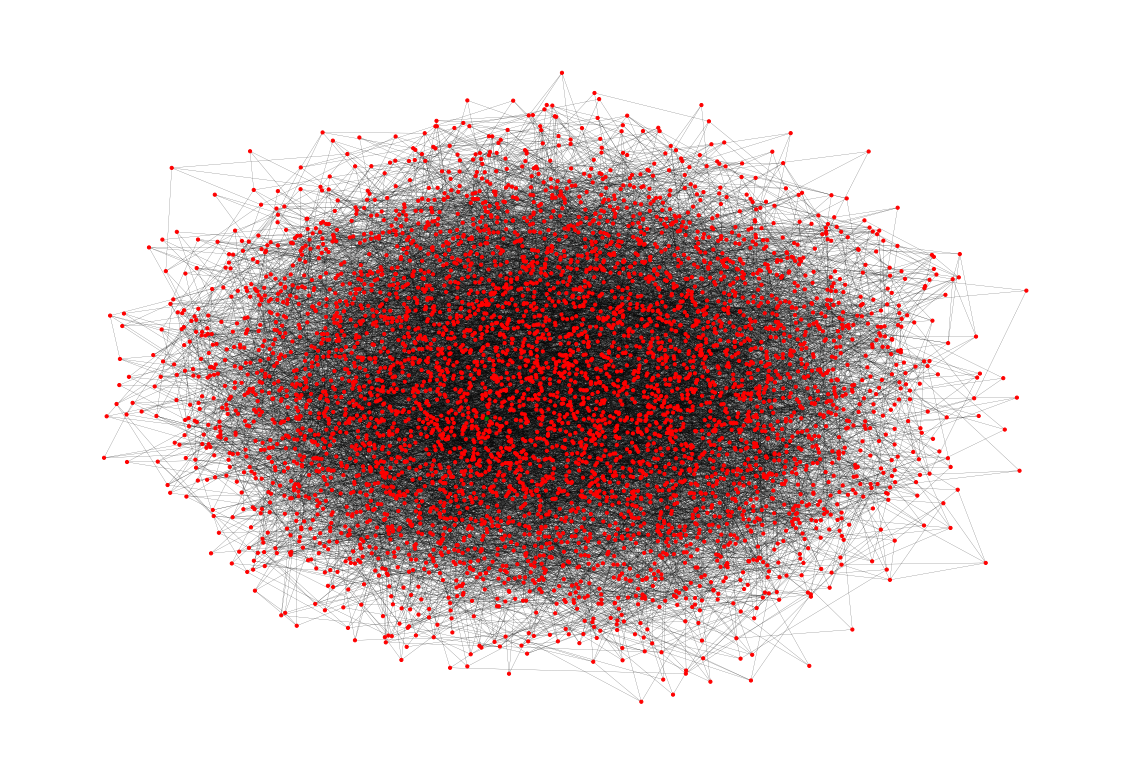

In [65]:
G = nx.connected_watts_strogatz_graph(n=N, k=k, p=0.5, tries=100)

pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(20, 14))
ax.axis('off')
nx.draw_networkx(G, pos=pos, ax=ax, node_size=10, with_labels=False, width=0.15, node_color=color_map)

In [66]:
for t in range(1, n):
  for i in range(1,G.number_of_nodes()):
    prob = rd.random()
    # ignorant contacts a spreader
    if (color_map[i] == sir_color['ignorant']) and (sir_color['spreader'] in [color_map[j] for j in [n for n in G.neighbors(i)]]):
      trust = rd.random()
      if trust < alpha:
        # spreader is untrusted
        if prob < beta*lambda_:
          color_map[i] = sir_color['spreader']
      else:
        # spreader is trusted
        if prob < lambda_:
          color_map[i] = sir_color['spreader']

    elif (color_map[i] == sir_color['spreader']):
      # spreader contacts another spreader or stifler
      if (sir_color['spreader'] in [color_map[j] for j in [n for n in G.neighbors(i)]]) or (sir_color['stifler'] in [color_map[j] for j in [n for n in G.neighbors(i)]]):
        if prob < sigma:
          color_map[i] = sir_color['stifler']
      else:
        # no contact (forgetting or disinclination)
        if prob < delta:
          color_map[i] = sir_color['stifler']

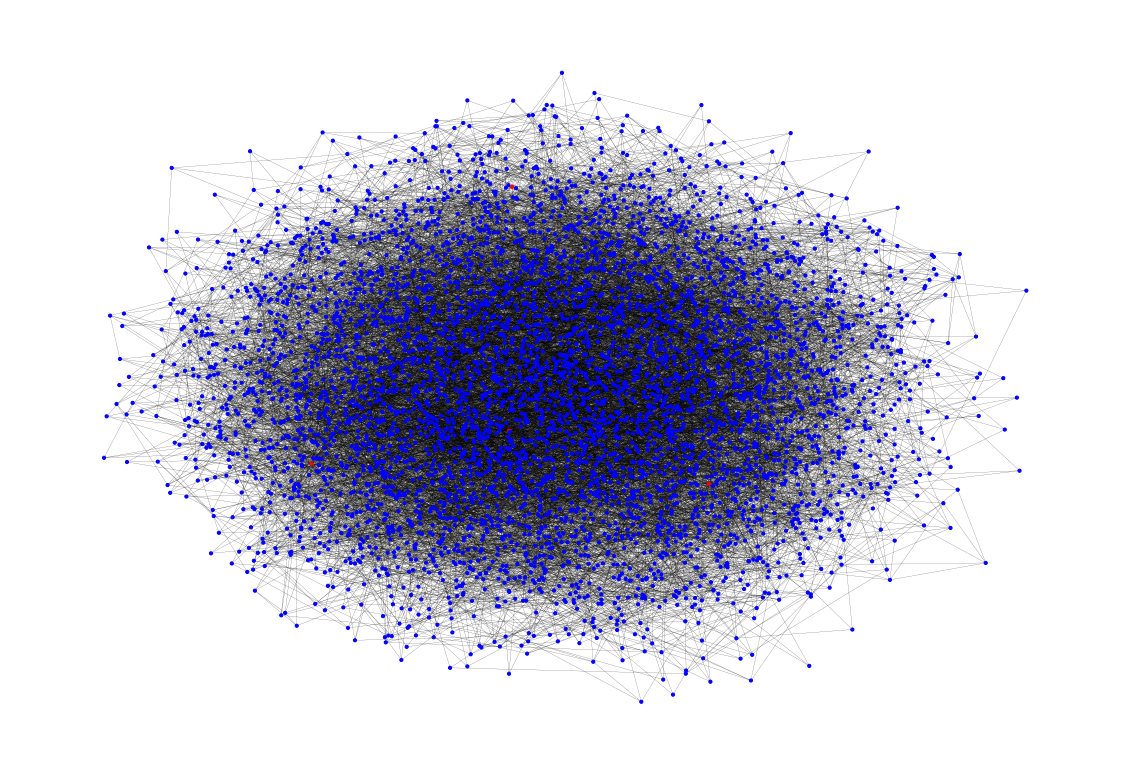

In [67]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(20, 14))
ax.axis('off')
nx.draw_networkx(G, pos=pos, ax=ax, node_size=10, with_labels=False, width=0.15, node_color=color_map)

In [68]:
sir_color

{'ignorant': 'red', 'spreader': 'green', 'stifler': 'blue'}

In [69]:
num_ignorant = 0
num_spreader = 0
num_stifler = 0
for i in range(G.number_of_nodes()):
    num_ignorant += sum([sir_color['ignorant']==color_map[i]])
    num_spreader += sum([sir_color['spreader']==color_map[i]])
    num_stifler += sum([sir_color['stifler']==color_map[i]])
    
print('Fraction Ignorant = ', num_ignorant/N)
print('Fraction Spreader = ', num_spreader/N)
print('Fraction Stifler = ', num_stifler/N)

Fraction Ignorant =  0.0008
Fraction Spreader =  0.0
Fraction Stifler =  0.9992
